# Data Modeling

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import model_selection

## Load the data and train_test_split

In [2]:
df = pd.read_csv('exports/PROJ_DF.csv')

In [4]:
pd.set_option('display.max.columns', None)
df.head()

,Unnamed: 0,CASENUM,MAXSEV_IM,SEV_ACC,CF_3,CF_5,CF_7,CF_12,CF_13,CF_14,CF_15,CF_16,CF_17,CF_19,CF_20,CF_21,CF_23,CF_24,CF_25,CF_26,CF_27,CF_28,STRATUM_2,STRATUM_3,STRATUM_4,STRATUM_5,STRATUM_6,STRATUM_7,STRATUM_8,STRATUM_9,STRATUM_10,LGTCON_IM_1,LGTCON_IM_2,LGTCON_IM_3,LGTCON_IM_4,LGTCON_IM_5,LGTCON_IM_6,LGTCON_IM_7,EVENT1_IM_1,EVENT1_IM_2,EVENT1_IM_3,EVENT1_IM_5,EVENT1_IM_6,EVENT1_IM_7,EVENT1_IM_8,EVENT1_IM_9,EVENT1_IM_10,EVENT1_IM_11,EVENT1_IM_12,EVENT1_IM_14,EVENT1_IM_15,EVENT1_IM_16,EVENT1_IM_17,EVENT1_IM_18,EVENT1_IM_19,EVENT1_IM_20,EVENT1_IM_21,EVENT1_IM_23,EVENT1_IM_24,EVENT1_IM_25,EVENT1_IM_26,EVENT1_IM_30,EVENT1_IM_31,EVENT1_IM_32,EVENT1_IM_33,EVENT1_IM_34,EVENT1_IM_35,EVENT1_IM_38,EVENT1_IM_39,EVENT1_IM_40,EVENT1_IM_41,EVENT1_IM_42,EVENT1_IM_43,EVENT1_IM_44,EVENT1_IM_45,EVENT1_IM_46,EVENT1_IM_48,EVENT1_IM_49,EVENT1_IM_50,EVENT1_IM_51,EVENT1_IM_52,EVENT1_IM_53,EVENT1_IM_54,EVENT1_IM_55,EVENT1_IM_57,EVENT1_IM_58,EVENT1_IM_59,EVENT1_IM_72,EVENT1_IM_73,EVENT1_IM_74,EVENT1_IM_91,EVENT1_IM_93,TYP_INT_1,TYP_INT_2,TYP_INT_3,TYP_INT_4,TYP_INT_5,TYP_INT_6,TYP_INT_7,TYP_INT_10,REL_ROAD_1,REL_ROAD_2,REL_ROAD_3,REL_ROAD_4,REL_ROAD_5,REL_ROAD_6,REL_ROAD_7,REL_ROAD_8,REL_ROAD_10,REL_ROAD_11,REL_ROAD_12,WRK_ZONE_0,WRK_ZONE_1,WRK_ZONE_2,WRK_ZONE_3,WRK_ZONE_4,WEATHR_IM_1,WEATHR_IM_2,WEATHR_IM_3,WEATHR_IM_4,WEATHR_IM_5,WEATHR_IM_6,WEATHR_IM_7,WEATHR_IM_8,WEATHR_IM_10,WEATHR_IM_11,WEATHR_IM_12,ALCHL_IM_1,ALCHL_IM_2,REGION_1,REGION_2,REGION_3,REGION_4,URBANICITY_1,URBANICITY_2,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WKDY_IM_1,WKDY_IM_2,WKDY_IM_3,WKDY_IM_4,WKDY_IM_5,WKDY_IM_6,WKDY_IM_7,OLD_CAR,SPD_L30MPH,SPD_30_65MPH,SPD_G65MPH,BDYTYP_IM_1,BDYTYP_IM_2,BDYTYP_IM_3,BDYTYP_IM_4,BDYTYP_IM_5,BDYTYP_IM_6,BDYTYP_IM_7,BDYTYP_IM_8,BDYTYP_IM_9,BDYTYP_IM_10,BDYTYP_IM_11,BDYTYP_IM_12,BDYTYP_IM_13,BDYTYP_IM_14,BDYTYP_IM_15,BDYTYP_IM_16,BDYTYP_IM_17,BDYTYP_IM_19,BDYTYP_IM_20,BDYTYP_IM_21,BDYTYP_IM_22,BDYTYP_IM_28,BDYTYP_IM_29,BDYTYP_IM_30,BDYTYP_IM_31,BDYTYP_IM_32,BDYTYP_IM_34,BDYTYP_IM_39,BDYTYP_IM_40,BDYTYP_IM_41,BDYTYP_IM_42,BDYTYP_IM_45,BDYTYP_IM_48,BDYTYP_IM_50,BDYTYP_IM_51,BDYTYP_IM_52,BDYTYP_IM_55,BDYTYP_IM_58,BDYTYP_IM_59,BDYTYP_IM_60,BDYTYP_IM_61,BDYTYP_IM_62,BDYTYP_IM_63,BDYTYP_IM_64,BDYTYP_IM_65,BDYTYP_IM_66,BDYTYP_IM_67,BDYTYP_IM_71,BDYTYP_IM_72,BDYTYP_IM_73,BDYTYP_IM_78,BDYTYP_IM_80,BDYTYP_IM_81,BDYTYP_IM_82,BDYTYP_IM_83,BDYTYP_IM_84,BDYTYP_IM_85,BDYTYP_IM_86,BDYTYP_IM_87,BDYTYP_IM_88,BDYTYP_IM_89,BDYTYP_IM_90,BDYTYP_IM_91,BDYTYP_IM_92,BDYTYP_IM_93,BDYTYP_IM_94,BDYTYP_IM_95,BDYTYP_IM_96,BDYTYP_IM_97,SPEEDREL_0,SPEEDREL_2,SPEEDREL_3,SPEEDREL_4,SPEEDREL_5,VALIGN_0,VALIGN_1,VALIGN_2,VALIGN_3,VALIGN_4,VPROFILE_0,VPROFILE_1,VPROFILE_2,VPROFILE_3,VPROFILE_4,VPROFILE_5,VPROFILE_6,VSURCOND_0,VSURCOND_1,VSURCOND_2,VSURCOND_3,VSURCOND_4,VSURCOND_5,VSURCOND_6,VSURCOND_7,VSURCOND_8,VSURCOND_10,VSURCOND_11,PCRASH1_IM_0,PCRASH1_IM_1,PCRASH1_IM_2,PCRASH1_IM_3,PCRASH1_IM_4,PCRASH1_IM_5,PCRASH1_IM_6,PCRASH1_IM_7,PCRASH1_IM_8,PCRASH1_IM_9,PCRASH1_IM_10,PCRASH1_IM_11,PCRASH1_IM_12,PCRASH1_IM_13,PCRASH1_IM_14,PCRASH1_IM_15,PCRASH1_IM_16,PCRASH1_IM_17,PCRASH1_IM_98,DR_SF_6,DR_SF_8,DR_SF_9,DR_SF_10,DR_SF_16,DR_SF_18,DR_SF_20,DR_SF_21,DR_SF_22,DR_SF_23,DR_SF_24,DR_SF_32,DR_SF_36,DR_SF_37,DR_SF_50,DR_SF_51,DR_SF_54,DR_SF_55,DR_SF_56,DR_SF_57,DR_SF_58,DR_SF_59,DR_SF_60,DR_SF_91,IMPAIRED_NONE,IMPAIRED_BLACKOUT,IMPAIRED_ASLEEP,IMPAIRED_CANE,IMPAIRED_PARAPALEGIC,IMPAIRED_PREINJ,IMPAIRED_DEAF,IMPAIRED_BLIND,IMPAIRED_EMOTIONAL,IMPAIRED_DUI,IMPAIRED_PHY_UNK,IMPAIRED_NO_DRIVER,IMPAIRED_OTHER,age_L16,age_16_24,age_25_54,age_G55,SEX_IM_1,SEX_IM_2,REST_USE_0,REST_USE_1,REST_USE_2,REST_USE_3,REST_USE_4,REST_USE_5,REST_USE_7,REST_USE_8,REST_USE_10,REST_USE_11,REST_USE_12,REST_USE_16,REST_USE_17,REST_USE_19,REST_USE_20,REST_USE_29,REST_USE_96,REST_USE_97,REST_MIS_0,REST_MIS_1,DRUGS_0,DRUGS_1,MFACTOR_0,MFACTOR_1,MFACTOR_2,MFACTOR_3,MFACTOR_4,MFACTOR_5,MFACTOR_6,MFACTOR_7,MFACTOR_8,MFACTOR_9,MFACTOR_10,MFACTOR_11,MFACTOR

In [5]:
# Let's drop the accident severity column. It's kind of a dead give-a-away.
# Also, don't need unnamed, or stratum. How can we know what kind of accident it is beforehand??
# Finally, last few are included in dataset, but undefined in manual.  What are they??  Must drop...

df = df.drop(['MAXSEV_IM', 'CASENUM', 'Unnamed: 0', 'STRATUM_10', 'STRATUM_2', 'STRATUM_3', 'STRATUM_4', 'STRATUM_5', 'STRATUM_6', 'STRATUM_7', 'STRATUM_8', 'STRATUM_9', 'CF_12', 'REL_ROAD_12', 'WRK_ZONE_4'], axis=1)

In [7]:
# Dropping more - TWEAKING

#df = df.drop(['MONTH', 'WKDY_IM'], axis=1)


In [8]:
# 'SEV_ACC' is the column we want to test on...

X = df.drop(['SEV_ACC'], axis=1)
y = df['SEV_ACC']

In [9]:
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

## Random Forest Classifier

https://www.datacamp.com/community/tutorials/random-forests-classifier-python

https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652

In [10]:
from sklearn.ensemble import RandomForestClassifier

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [9]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [10]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[42855   325]
 [ 5614   664]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     43180
           1       0.67      0.11      0.18      6278

    accuracy                           0.88     49458
   macro avg       0.78      0.55      0.56     49458
weighted avg       0.86      0.88      0.84     49458



=== All AUC Scores ===
[0.7870742  0.78204785 0.77721349 0.79264046 0.77248717 0.78221157
 0.78340341 0.78329038 0.78347489 0.78643387]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7830277291071646


In [11]:
rfc.score(X_train,y_train)

0.9999004113013256

In [12]:
rfc.score(X_test,y_test)

0.8799183145294998

In [9]:
print(accuracy_score(rfc_predict, y_test))

NameError: name 'accuracy_score' is not defined

## Gradient Booster Classifier

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_predict = gb.predict(X_test)

In [15]:
gb_cv_score = cross_val_score(gb, X, y, cv=10, scoring='roc_auc')

In [16]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, gb_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, gb_predict))
print('\n')
print("=== All AUC Scores ===")
print(gb_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Gradient Booster Classifier: ", gb_cv_score.mean())

=== Confusion Matrix ===
[[42797   383]
 [ 5568   710]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     43180
           1       0.65      0.11      0.19      6278

    accuracy                           0.88     49458
   macro avg       0.77      0.55      0.56     49458
weighted avg       0.86      0.88      0.84     49458



=== All AUC Scores ===
[0.79362665 0.78971085 0.77502727 0.79088809 0.77366419 0.78874244
 0.78862154 0.78117469 0.7901935  0.79205538]


=== Mean AUC Score ===
Mean AUC Score - Gradient Booster Classifier:  0.7863704594959932


In [17]:
gb.score(X_test, y_test)

0.879675684419103

In [18]:
gb.score(X_train, y_train)

0.8857618037505104

## Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
gnb = GaussianNB()

In [21]:
#y_pred = gnb.fit(X_train, y_train).predict(X_test)

gnb.fit(X_train,y_train)
# predictions
gnb_predict = gnb.predict(X_test)

In [22]:
gnb.score(X_train, y_train)

0.27957535378885207

In [23]:
gnb.score(X_test,y_test)

0.2789841886044725

In [24]:
gnb_cv_score = cross_val_score(gnb, X, y, cv=10, scoring='roc_auc')

In [25]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, gnb_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, gnb_predict))
print('\n')
print("=== All AUC Scores ===")
print(gnb_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Naive Bayes: ", gnb_cv_score.mean())

=== Confusion Matrix ===
[[ 7911 35269]
 [  391  5887]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.18      0.31     43180
           1       0.14      0.94      0.25      6278

    accuracy                           0.28     49458
   macro avg       0.55      0.56      0.28     49458
weighted avg       0.85      0.28      0.30     49458



=== All AUC Scores ===
[0.72791057 0.71815822 0.70525074 0.70566601 0.6989005  0.71162125
 0.71629233 0.69539192 0.71016821 0.71322715]


=== Mean AUC Score ===
Mean AUC Score - Naive Bayes:  0.7102586908723474


In [ ]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != gnb_predict).sum()))

In [ ]:
# https://towardsdatascience.com/implementing-naive-bayes-in-2-minutes-with-python-3ecd788803fe

# fitting (??)
# train stats
means = X_train.groupby(y_train).apply(np.mean)
stds = X_train.groupby(y_train).apply(np.std)

# class prior probabilities
probs = X_train.groupby(y_train).apply(lambda x: len(x))/X_train.shape[0]

## Prediction

In [ ]:
X_test.iloc[0]

In [ ]:
print ("naive bayes", gnb.predict(np.array(X_test.iloc[0]).reshape(1, -1)))

In [ ]:
print ("random forest", rfc.predict(np.array(X_test.iloc[0]).reshape(1, -1)))

In [ ]:
print ("gradient boost", gb.predict(np.array(X_test.iloc[0]).reshape(1, -1)))

## Export Model (Pkl)

In [ ]:
import joblib

In [ ]:
# Let's export the models for use in a web app

# Naive Bayes model

joblib.dump(gnb, 'gnb.pkl', compress=True)

# Random Forest Classifier model

joblib.dump(gnb, 'rfc.pkl', compress=True)

# Gradient Booster model

joblib.dump(gb, 'gb.pkl', compress=True)


# Random Forest Feature Importance

https://mljar.com/blog/feature-importance-in-random-forest/

In [40]:
from sklearn.inspection import permutation_importance
import shap

#plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'figure.figsize': (12.0, 15.0)})
plt.rcParams.update({'font.size': 14})

To get shap to work, needed to look here:
https://stackoverflow.com/questions/14585598/installing-numba-for-python

Specfically needed:
* sudo apt-get install build-essential
* sudo apt-get install llvm
* pip install llvmpy
* pip install cython
* pip install numba


Could not get llvmpy to install without erroring out though...

In [41]:
rfc.feature_importances_

array([3.13068149e-04, 7.93064252e-06, 1.39348565e-07, 2.84693450e-05,
       2.37121269e-03, 2.06982581e-04, 5.77306409e-04, 8.44429634e-07,
       6.46562457e-04, 7.73751117e-04, 2.49464517e-04, 7.91681917e-04,
       1.43101776e-04, 1.88251329e-06, 1.30741597e-04, 2.67861114e-04,
       8.08662474e-04, 1.06155270e-02, 7.80828451e-03, 8.22563059e-03,
       2.24470869e-03, 2.77478267e-03, 1.15380007e-03, 5.65898814e-05,
       3.74800257e-03, 4.50158329e-05, 6.84023468e-05, 8.25499381e-04,
       5.67657084e-05, 4.63371069e-05, 5.77545418e-03, 1.95298473e-03,
       2.71339848e-04, 2.55698041e-03, 5.73438908e-03, 2.18171688e-03,
       5.88511043e-04, 5.59860488e-05, 1.21022503e-04, 6.44637606e-04,
       4.86691659e-04, 8.29520609e-05, 3.86089579e-04, 2.60173502e-04,
       1.88688283e-03, 9.96514198e-04, 1.98080761e-04, 1.99996707e-03,
       6.46361135e-04, 1.66193498e-03, 2.16308574e-03, 2.40157511e-03,
       1.93252742e-03, 1.12344748e-03, 4.60362431e-04, 2.56328569e-04,
      

In [42]:
# summarize feature importance
for i,v in enumerate(rfc.feature_importances_):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00031
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00003
Feature: 4, Score: 0.00237
Feature: 5, Score: 0.00021
Feature: 6, Score: 0.00058
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00065
Feature: 9, Score: 0.00077
Feature: 10, Score: 0.00025
Feature: 11, Score: 0.00079
Feature: 12, Score: 0.00014
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00013
Feature: 15, Score: 0.00027
Feature: 16, Score: 0.00081
Feature: 17, Score: 0.01062
Feature: 18, Score: 0.00781
Feature: 19, Score: 0.00823
Feature: 20, Score: 0.00224
Feature: 21, Score: 0.00277
Feature: 22, Score: 0.00115
Feature: 23, Score: 0.00006
Feature: 24, Score: 0.00375
Feature: 25, Score: 0.00005
Feature: 26, Score: 0.00007
Feature: 27, Score: 0.00083
Feature: 28, Score: 0.00006
Feature: 29, Score: 0.00005
Feature: 30, Score: 0.00578
Feature: 31, Score: 0.00195
Feature: 32, Score: 0.00027
Feature: 33, Score: 0.00256
Feature: 34, Score: 0.00573
Feature: 35, Score: 0.00218
Fe

<AxesSubplot:>

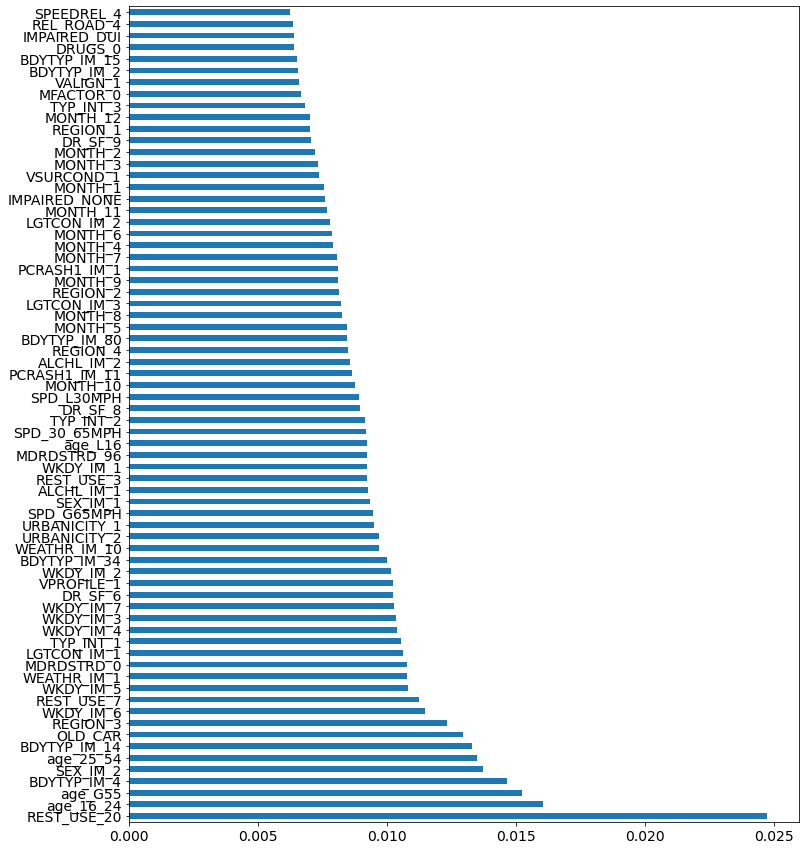

In [43]:
#feat_importances = rfc.feature_importances_
#plt.barh(X.columns, importances)
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)

feat_importances.nlargest(70).plot(kind='barh')


Text(0.5, 0, 'Random Forest Feature Importance')

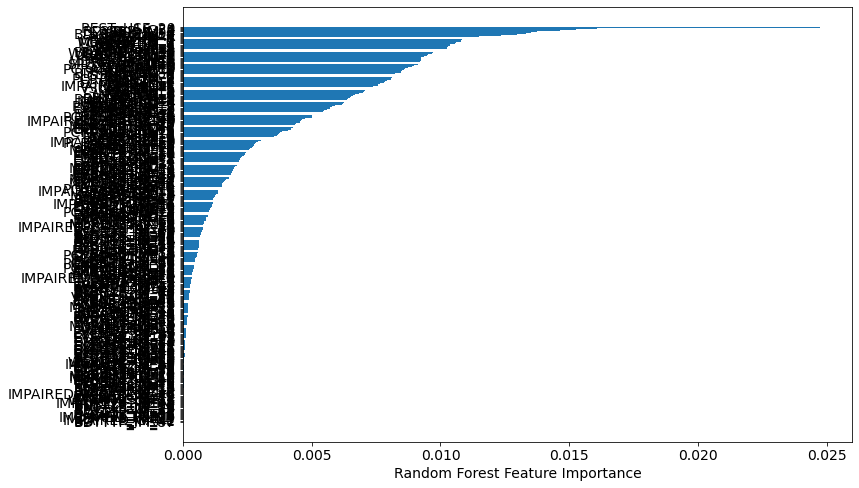

In [28]:
sorted_idx = rfc.feature_importances_.argsort()

#month_jan[feature_cols].sum().sort_values(ascending=0)[:10].plot(kind='bar')
#feat_importances.nlargest(20).plot(kind='barh')

plt.barh(X.columns[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

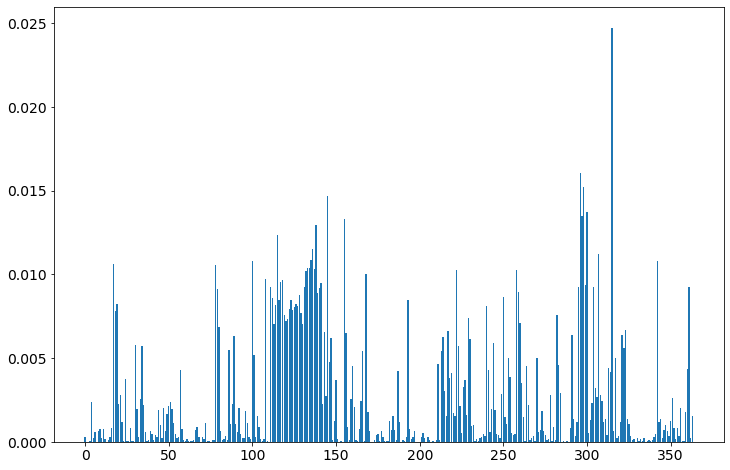

In [17]:
# plot feature importance
plt.bar([x for x in range(len(rfc.feature_importances_))], rfc.feature_importances_)
plt.show()

In [18]:
important_features_dict = {}
for x,i in enumerate(rfc.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print ('Most important features: %s' %important_features_list)

Most important features: [315, 296, 298, 145, 300, 297, 155, 138, 115, 136, 307, 135, 100, 342, 17, 78, 134, 133, 137, 258, 222, 132, 168, 108, 118, 117, 141, 299, 111, 304, 131, 361, 295, 140, 79, 259, 139, 128, 250, 112, 116, 193, 123, 126, 19, 114, 127, 240, 125, 122, 124, 18, 129, 282, 119, 229, 121, 120, 260, 113, 130, 80, 323, 217, 143, 156, 321, 291, 89, 214, 147, 230, 244, 30, 34, 223, 322, 86, 213, 166, 101, 317, 253, 270, 146, 211, 283, 264, 160, 313, 360, 241, 57, 187, 314, 219, 254, 218, 24, 227, 150, 261, 226, 305, 215, 284, 249, 308, 278, 21, 144, 306, 351, 159, 33, 165, 309, 51, 4, 303, 142, 88, 20, 35, 265, 50, 224, 161, 92, 356, 47, 31, 243, 52, 245, 44, 96, 273, 169, 359, 220, 49, 228, 363, 184, 221, 103, 216, 251, 262, 292, 324, 311, 344, 302, 350, 149, 182, 188, 343, 310, 320, 294, 22, 72, 53, 97, 90, 325, 252, 87, 45, 232, 347, 231, 157, 104, 67, 280, 27, 354, 352, 16, 290, 164, 11, 9, 58, 194, 272, 183, 185, 346, 66, 170, 316, 81, 197, 8, 48, 274, 39, 177, 348, 24

In [26]:
X.columns[138]

'OLD_CAR'

In [54]:
pd.set_option('display.max.columns', None)
X.head()

,CF_3,CF_5,CF_7,CF_13,CF_14,CF_15,CF_16,CF_17,CF_19,CF_20,CF_21,CF_23,CF_24,CF_25,CF_26,CF_27,CF_28,LGTCON_IM_1,LGTCON_IM_2,LGTCON_IM_3,LGTCON_IM_4,LGTCON_IM_5,LGTCON_IM_6,LGTCON_IM_7,EVENT1_IM_1,EVENT1_IM_2,EVENT1_IM_3,EVENT1_IM_5,EVENT1_IM_6,EVENT1_IM_7,EVENT1_IM_8,EVENT1_IM_9,EVENT1_IM_10,EVENT1_IM_11,EVENT1_IM_12,EVENT1_IM_14,EVENT1_IM_15,EVENT1_IM_16,EVENT1_IM_17,EVENT1_IM_18,EVENT1_IM_19,EVENT1_IM_20,EVENT1_IM_21,EVENT1_IM_23,EVENT1_IM_24,EVENT1_IM_25,EVENT1_IM_26,EVENT1_IM_30,EVENT1_IM_31,EVENT1_IM_32,EVENT1_IM_33,EVENT1_IM_34,EVENT1_IM_35,EVENT1_IM_38,EVENT1_IM_39,EVENT1_IM_40,EVENT1_IM_41,EVENT1_IM_42,EVENT1_IM_43,EVENT1_IM_44,EVENT1_IM_45,EVENT1_IM_46,EVENT1_IM_48,EVENT1_IM_49,EVENT1_IM_50,EVENT1_IM_51,EVENT1_IM_52,EVENT1_IM_53,EVENT1_IM_54,EVENT1_IM_55,EVENT1_IM_57,EVENT1_IM_58,EVENT1_IM_59,EVENT1_IM_72,EVENT1_IM_73,EVENT1_IM_74,EVENT1_IM_91,EVENT1_IM_93,TYP_INT_1,TYP_INT_2,TYP_INT_3,TYP_INT_4,TYP_INT_5,TYP_INT_6,TYP_INT_7,TYP_INT_10,REL_ROAD_1,REL_ROAD_2,REL_ROAD_3,REL_ROAD_4,REL_ROAD_5,REL_ROAD_6,REL_ROAD_7,REL_ROAD_8,REL_ROAD_10,REL_ROAD_11,WRK_ZONE_0,WRK_ZONE_1,WRK_ZONE_2,WRK_ZONE_3,WEATHR_IM_1,WEATHR_IM_2,WEATHR_IM_3,WEATHR_IM_4,WEATHR_IM_5,WEATHR_IM_6,WEATHR_IM_7,WEATHR_IM_8,WEATHR_IM_10,WEATHR_IM_11,WEATHR_IM_12,ALCHL_IM_1,ALCHL_IM_2,REGION_1,REGION_2,REGION_3,REGION_4,URBANICITY_1,URBANICITY_2,OLD_CAR,SPD_L30MPH,SPD_30_65MPH,SPD_G65MPH,BDYTYP_IM_1,BDYTYP_IM_2,BDYTYP_IM_3,BDYTYP_IM_4,BDYTYP_IM_5,BDYTYP_IM_6,BDYTYP_IM_7,BDYTYP_IM_8,BDYTYP_IM_9,BDYTYP_IM_10,BDYTYP_IM_11,BDYTYP_IM_12,BDYTYP_IM_13,BDYTYP_IM_14,BDYTYP_IM_15,BDYTYP_IM_16,BDYTYP_IM_17,BDYTYP_IM_19,BDYTYP_IM_20,BDYTYP_IM_21,BDYTYP_IM_22,BDYTYP_IM_28,BDYTYP_IM_29,BDYTYP_IM_30,BDYTYP_IM_31,BDYTYP_IM_32,BDYTYP_IM_34,BDYTYP_IM_39,BDYTYP_IM_40,BDYTYP_IM_41,BDYTYP_IM_42,BDYTYP_IM_45,BDYTYP_IM_48,BDYTYP_IM_50,BDYTYP_IM_51,BDYTYP_IM_52,BDYTYP_IM_55,BDYTYP_IM_58,BDYTYP_IM_59,BDYTYP_IM_60,BDYTYP_IM_61,BDYTYP_IM_62,BDYTYP_IM_63,BDYTYP_IM_64,BDYTYP_IM_65,BDYTYP_IM_66,BDYTYP_IM_67,BDYTYP_IM_71,BDYTYP_IM_72,BDYTYP_IM_73,BDYTYP_IM_78,BDYTYP_IM_80,BDYTYP_IM_81,BDYTYP_IM_82,BDYTYP_IM_83,BDYTYP_IM_84,BDYTYP_IM_85,BDYTYP_IM_86,BDYTYP_IM_87,BDYTYP_IM_88,BDYTYP_IM_89,BDYTYP_IM_90,BDYTYP_IM_91,BDYTYP_IM_92,BDYTYP_IM_93,BDYTYP_IM_94,BDYTYP_IM_95,BDYTYP_IM_96,BDYTYP_IM_97,SPEEDREL_0,SPEEDREL_2,SPEEDREL_3,SPEEDREL_4,SPEEDREL_5,VALIGN_0,VALIGN_1,VALIGN_2,VALIGN_3,VALIGN_4,VPROFILE_0,VPROFILE_1,VPROFILE_2,VPROFILE_3,VPROFILE_4,VPROFILE_5,VPROFILE_6,VSURCOND_0,VSURCOND_1,VSURCOND_2,VSURCOND_3,VSURCOND_4,VSURCOND_5,VSURCOND_6,VSURCOND_7,VSURCOND_8,VSURCOND_10,VSURCOND_11,PCRASH1_IM_0,PCRASH1_IM_1,PCRASH1_IM_2,PCRASH1_IM_3,PCRASH1_IM_4,PCRASH1_IM_5,PCRASH1_IM_6,PCRASH1_IM_7,PCRASH1_IM_8,PCRASH1_IM_9,PCRASH1_IM_10,PCRASH1_IM_11,PCRASH1_IM_12,PCRASH1_IM_13,PCRASH1_IM_14,PCRASH1_IM_15,PCRASH1_IM_16,PCRASH1_IM_17,PCRASH1_IM_98,DR_SF_6,DR_SF_8,DR_SF_9,DR_SF_10,DR_SF_16,DR_SF_18,DR_SF_20,DR_SF_21,DR_SF_22,DR_SF_23,DR_SF_24,DR_SF_32,DR_SF_36,DR_SF_37,DR_SF_50,DR_SF_51,DR_SF_54,DR_SF_55,DR_SF_56,DR_SF_57,DR_SF_58,DR_SF_59,DR_SF_60,DR_SF_91,IMPAIRED_NONE,IMPAIRED_BLACKOUT,IMPAIRED_ASLEEP,IMPAIRED_CANE,IMPAIRED_PARAPALEGIC,IMPAIRED_PREINJ,IMPAIRED_DEAF,IMPAIRED_BLIND,IMPAIRED_EMOTIONAL,IMPAIRED_DUI,IMPAIRED_PHY_UNK,IMPAIRED_NO_DRIVER,IMPAIRED_OTHER,age_L16,age_16_24,age_25_54,age_G55,SEX_IM_1,SEX_IM_2,REST_USE_0,REST_USE_1,REST_USE_2,REST_USE_3,REST_USE_4,REST_USE_5,REST_USE_7,REST_USE_8,REST_USE_10,REST_USE_11,REST_USE_12,REST_USE_16,REST_USE_17,REST_USE_19,REST_USE_20,REST_USE_29,REST_USE_96,REST_USE_97,REST_MIS_0,REST_MIS_1,DRUGS_0,DRUGS_1,MFACTOR_0,MFACTOR_1,MFACTOR_2,MFACTOR_3,MFACTOR_4,MFACTOR_5,MFACTOR_6,MFACTOR_7,MFACTOR_8,MFACTOR_9,MFACTOR_10,MFACTOR_11,MFACTOR_12,MFACTOR_13,MFACTOR_14,MFACTOR_15,MFACTOR_16,MFACTOR_17,MFACTOR_97,MDRDSTRD_0,MDRDSTRD_1,MDRDSTRD_3,MDRDSTRD_4,MDRDSTRD_5,MDRDSTRD_6,MDRDSTRD_7,MDRDSTRD_9,MDRDSTRD_10,MDRDSTRD_12,MDRDSTRD_13,MDRDSTRD_14,MDRDSTRD_15,MDRDSTRD_16,MDRDSTRD_17,MDRDSTRD_18,MDRDSTRD_19,MDRDSTRD_92,MDRDSTRD_93,MDRDSTRD_96,MDRDSTRD_97,MDRDSTRD_98
